#Practica 3: Modelado de Datos - Regresión

1. Importar librerias
2. Leer/seleccionar/renombrar datos
3. Preparación de datos
4. Partición del conjunto de datos
5. Modelo de regresión lineal simple (entrenamiento y predicción)
6. Cálculo de parametros y precisión
7. Gráfico del modelo


##Importar librerias

In [2]:
#Se importan la librerias a utilizar 
import numpy as np
import pandas as pd
from sklearn import linear_model #para modelo de regresión
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #para partición de datos


## Leer/seleccionar/renombrar datos

In [3]:
#Importamos los datos de excel
df = pd.read_excel('BD-Inmuebles.xls') 
df.head()

,Referencia,Fecha Alta,Tipo,Operación,Provincia,Superficie,Precio Venta,Fecha Venta,Vendedor
0,1,2004-01-01,Parking,Alquiler,Lleida,291,2133903,2004-06-19,Carmen
1,2,2004-01-01,Local,Venta,Girona,199,1945424,2004-04-19,Pedro
2,3,2004-01-01,Oficina,Alquiler,Girona,82,712416,2004-11-08,Joaquín
3,4,2004-01-02,Parking,Alquiler,Girona,285,1815450,2004-04-27,Jesús
4,5,2004-01-02,Suelo,Venta,Tarragona,152,1138024,2004-07-10,María


In [4]:
#seleccionar y renombrar datos
df = df[['Superficie',	'Precio Venta']]
df.columns = ['M2', 'Valor']
df.head()

,M2,Valor
0,291,2133903
1,199,1945424
2,82,712416
3,285,1815450
4,152,1138024


## Preparación de datos

In [5]:
# limpieza de datos
df.isnull().any()

M2       False
Valor    False
dtype: bool

## Partición del conjunto de datos

Conjunto de entrenamiento (train) y prueba (test)

In [6]:
#Asignar "X" y "y"
X = df[['M2']]
y = df[['Valor']]

#Separo los datos de "train" en entrenamiento y prueba "test" 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Modelo de regresión lineal simple (entrenamiento y predicción)

In [7]:
#Defino el algoritmo a usar
RLS = linear_model.LinearRegression()

#Entreno el modelo
RLS.fit(X_train, y_train)

#Predicción
Y_pred = RLS.predict(X_test)

## Calcular parámetros y precisión

In [9]:
#Calcular coeficiente "a"
a = RLS.coef_
print('Valor de la pendiente o coeficiente "a": ')
print(a)

#Calcular intercepto "b"
b = RLS.intercept_
print('Valor del intercepto "b": ')
print(b)

print()
print('La ecuación del modelo es igual a: ')
print('y = ', a, '* X + ',b)

Valor de la pendiente o coeficiente "a": 
[[7072.00905966]]
Valor del intercepto "b": 
[-1375.08817574]

La ecuación del modelo es igual a: 
y =  [[7072.00905966]] * X +  [-1375.08817574]


In [10]:
#Calculo de precisión R2
R2 = RLS.score(X_test, y_test)
print()
print('Precisión del modelo "R2": ')
print(R2)


Precisión del modelo "R2": 
0.7451406308133994


In [12]:
#Predecir un valor
y1 = a*200 + b

print(y1)

[[1413026.72375553]]


## Grafico del modelo

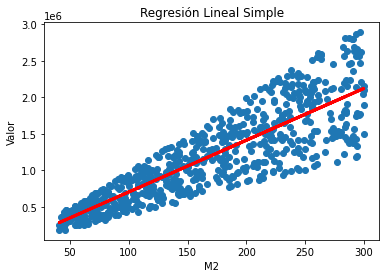

In [11]:
#Graficamos los datos con el modelo
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
plt.xlabel('M2')
plt.ylabel('Valor')
plt.show()